# Compare All Models
## Chest X-ray Classification

Compare results from all 8 experiments (4 models × 2 loss functions).

In [1]:
import sys
sys.path.append('..')

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import Image as IPImage, display

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Load All Results

In [2]:
# Load summary CSV (generated by compare_results.py)
summary_path = Path('../results/summary.csv')

if summary_path.exists():
    df = pd.read_csv(summary_path)
    print("Loaded results for", len(df), "experiments")
    display(df)
else:
    print("Summary not found! Run: python scripts/experiments/compare_results.py")

Loaded results for 8 experiments


,experiment_id,model,loss,accuracy,precision,recall,f1,auc
0,exp01_densenet121_weighted_ce,DenseNet-121,Weighted CE,90.814314,90.340271,90.273761,90.306623,98.302350
1,exp02_densenet121_focal,DenseNet-121,Focal Loss,91.406030,91.034104,90.815449,90.866643,98.401429
2,exp03_efficientnet_b0_weighted_ce,EfficientNet-B0,Weighted CE,90.476190,90.073955,89.765032,89.915201,98.204728
3,exp04_efficientnet_b0_focal,EfficientNet-B0,Focal Loss,90.419837,90.164979,89.792083,89.921157,98.288227
4,exp05_lenet_weighted_ce,LeNet,Weighted CE,87.094956,86.690716,87.278851,86.827835,97.406676
5,exp06_lenet_focal,LeNet,Focal Loss,86.475063,86.307793,84.903637,85.500446,97.081078
6,exp07_mlp_weighted_ce,MLP,Weighted CE,61.453931,55.833981,57.632953,55.474231,84.766836
7,exp08_mlp_focal,MLP,Focal Loss,59.988729,53.094094,56.391240,53.758333,82.597825


## 2. Overall Ranking

In [3]:
# Sort by accuracy
df_sorted = df.sort_values('accuracy', ascending=False)

print("\n🏆 MODEL RANKING BY ACCURACY:\n")
for i, row in enumerate(df_sorted.itertuples(), 1):
    print(f"{i}. {row.model} ({row.loss}): {row.accuracy:.2f}%")


🏆 MODEL RANKING BY ACCURACY:

1. DenseNet-121 (Focal Loss): 91.41%
2. DenseNet-121 (Weighted CE): 90.81%
3. EfficientNet-B0 (Weighted CE): 90.48%
4. EfficientNet-B0 (Focal Loss): 90.42%
5. LeNet (Weighted CE): 87.09%
6. LeNet (Focal Loss): 86.48%
7. MLP (Weighted CE): 61.45%
8. MLP (Focal Loss): 59.99%


## 3. Comparison Plots


accuracy_comparison:


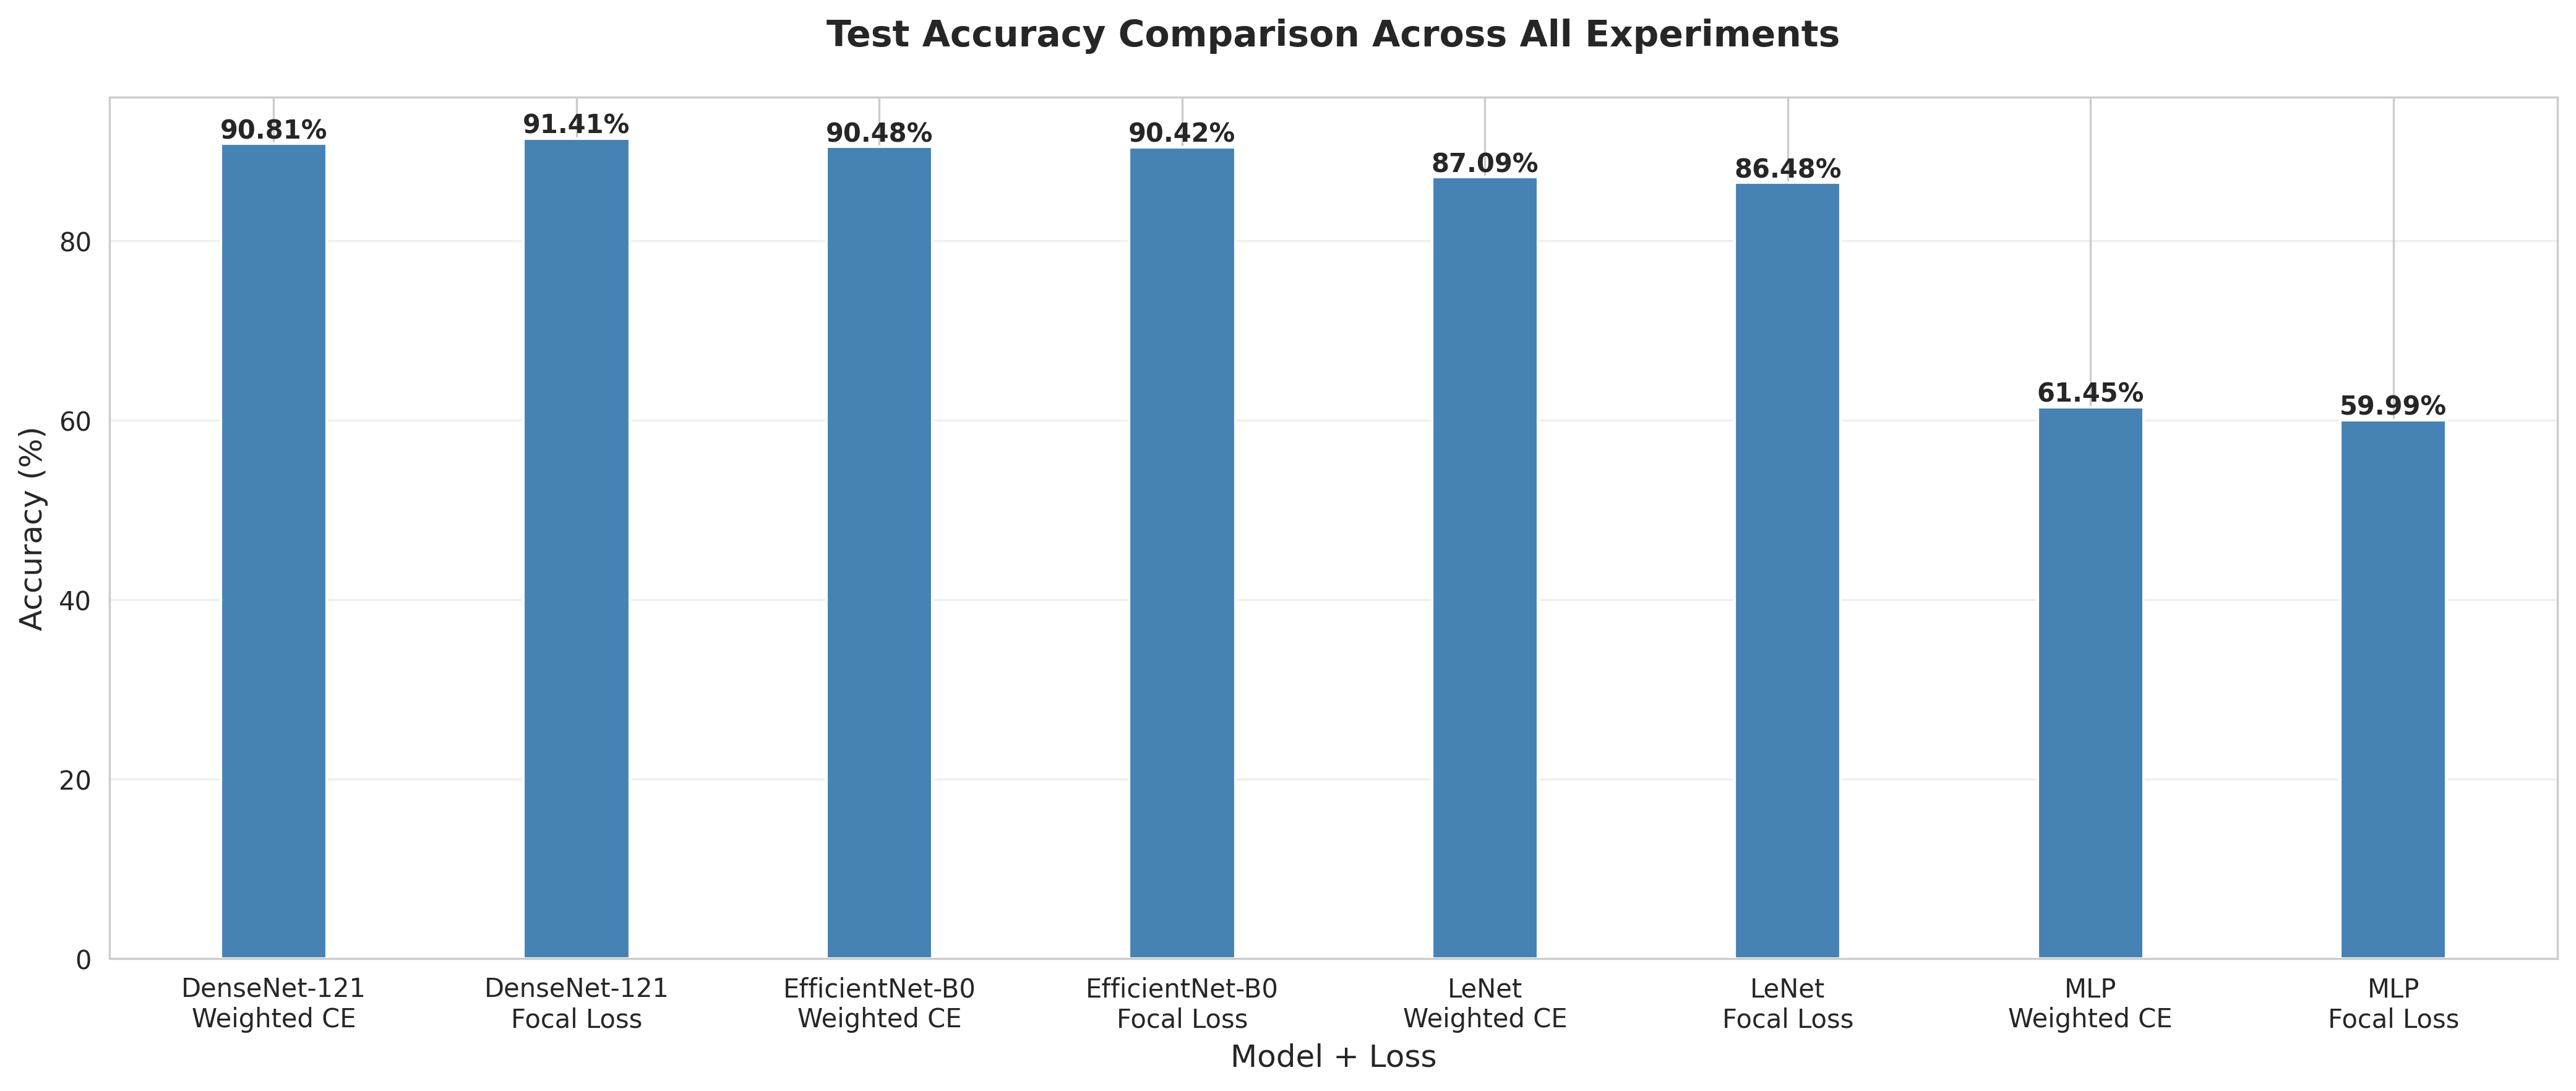


metrics_comparison:


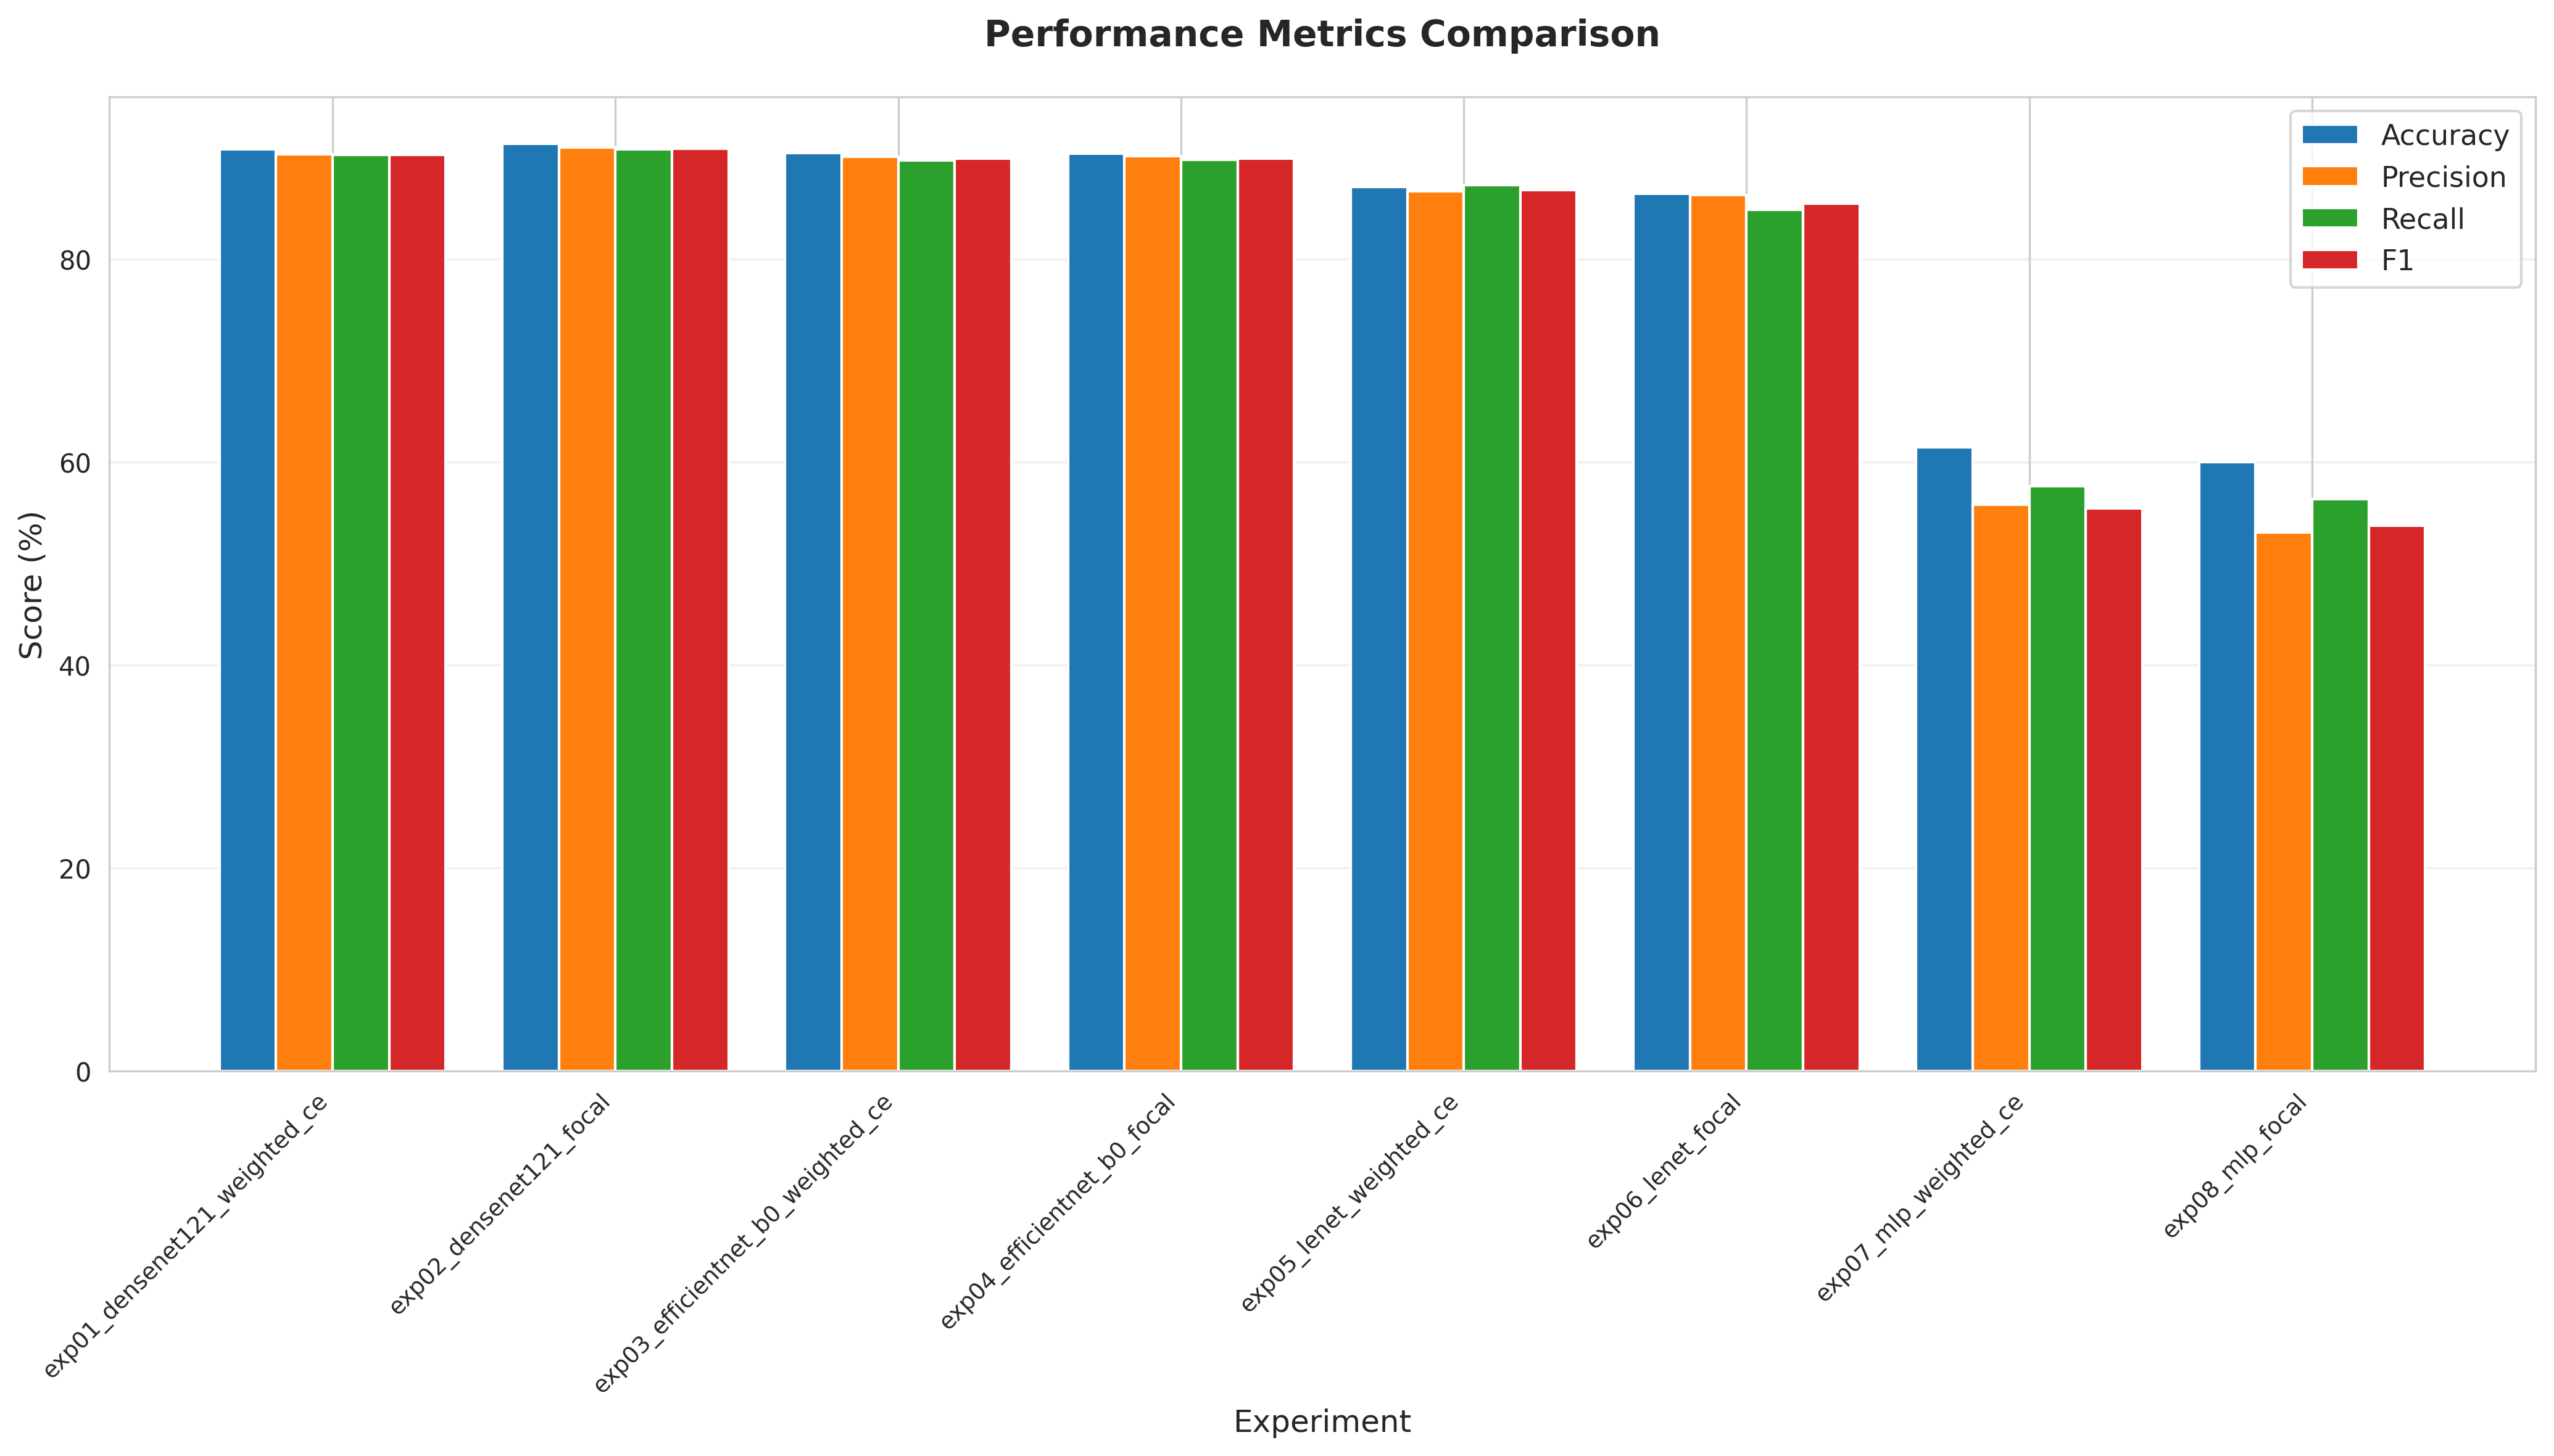


model_comparison_by_loss:


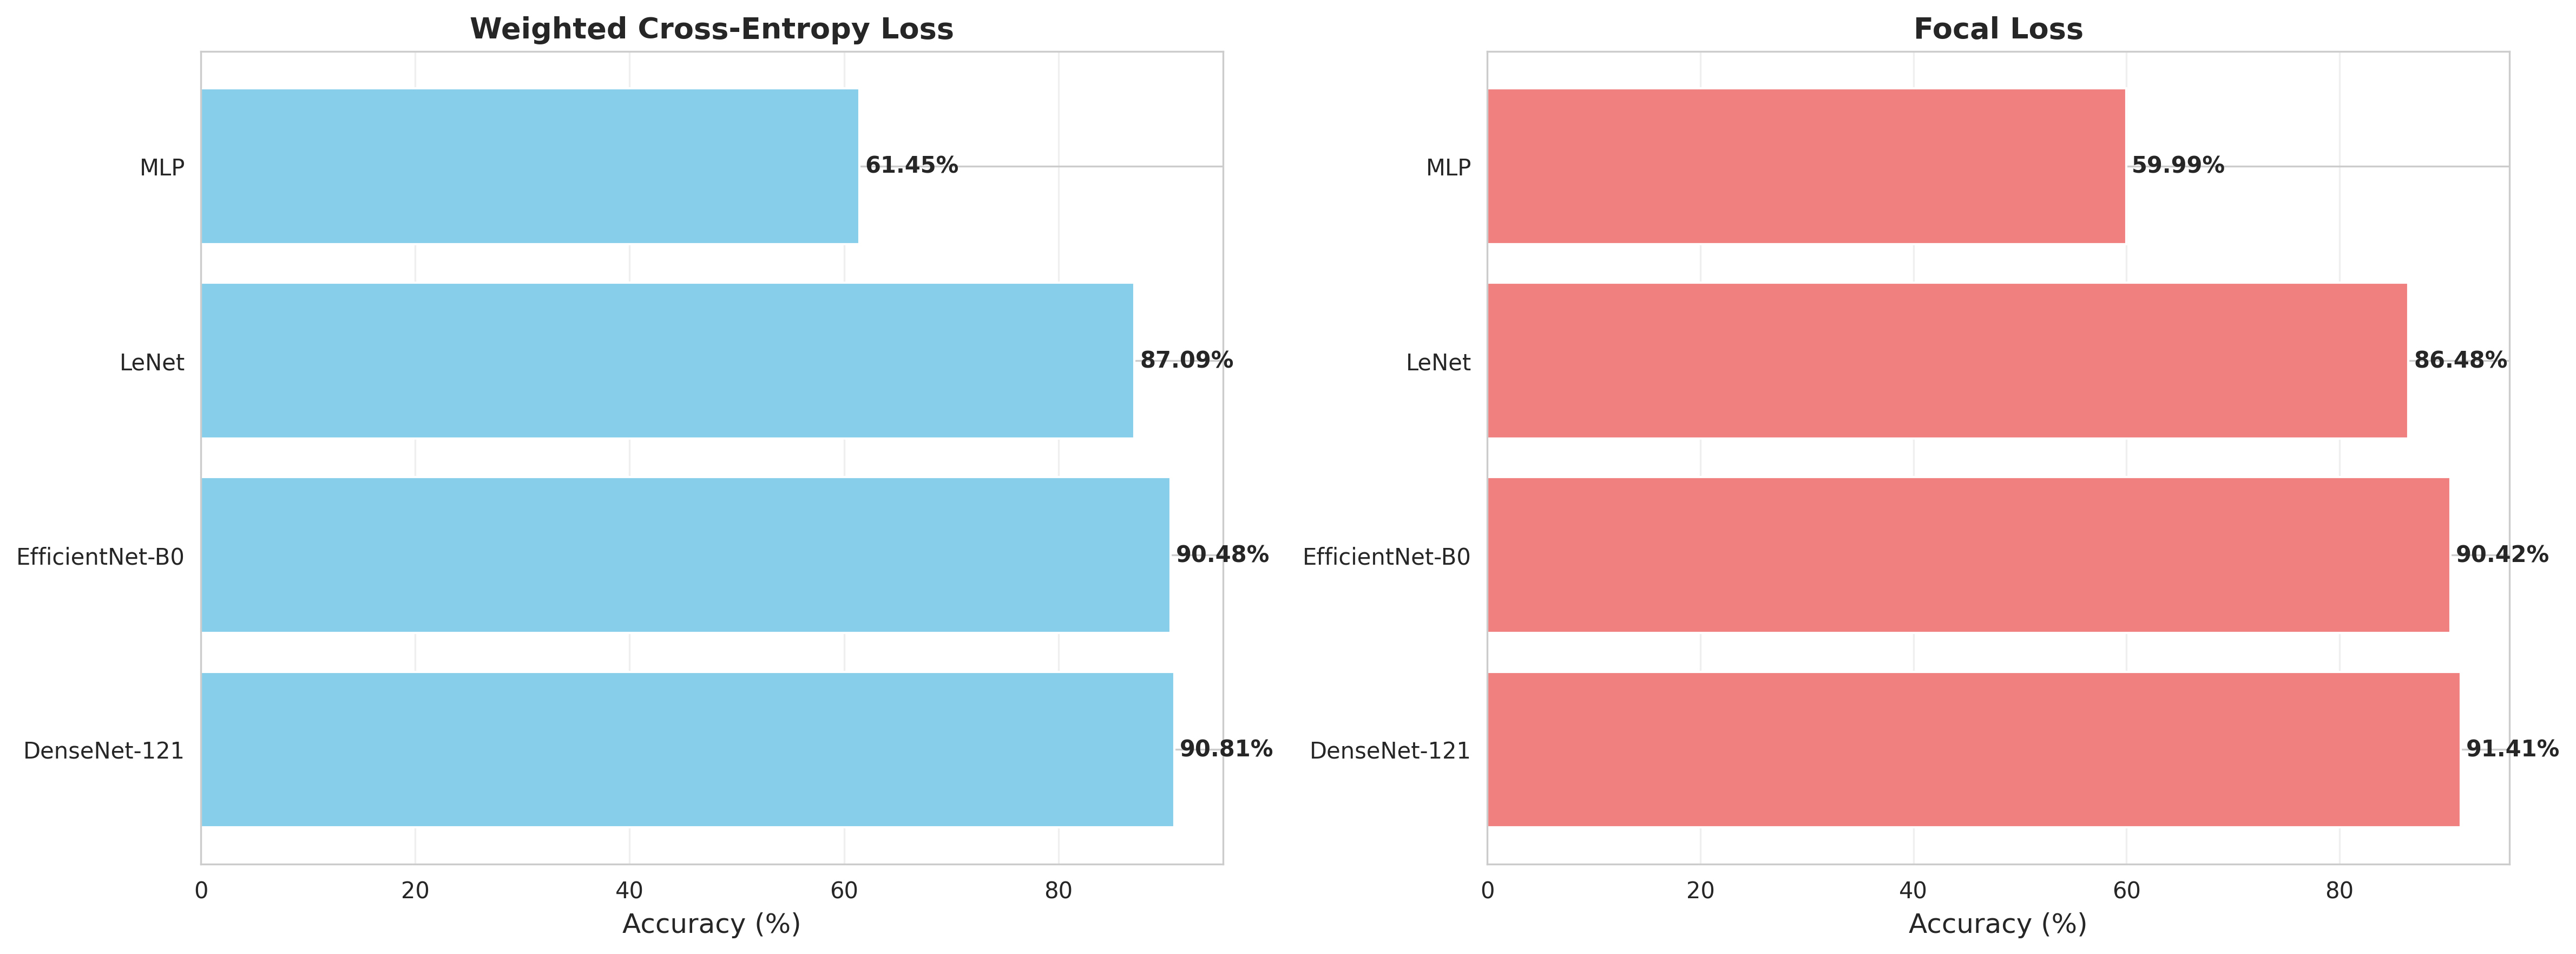

In [4]:
# Display saved comparison plots
plots = [
    '../results/accuracy_comparison.png',
    '../results/metrics_comparison.png',
    '../results/model_comparison_by_loss.png'
]

for plot_path in plots:
    if Path(plot_path).exists():
        print(f"\n{Path(plot_path).stem}:")
        display(IPImage(filename=plot_path))
    else:
        print(f"Plot not found: {plot_path}")

## 4. Loss Function Comparison

In [5]:
# Compare Weighted CE vs Focal Loss
wce_mean = df[df['loss'] == 'Weighted CE']['accuracy'].mean()
focal_mean = df[df['loss'] == 'Focal Loss']['accuracy'].mean()

print("Average Performance by Loss Function:")
print(f"  Weighted CE:   {wce_mean:.2f}%")
print(f"  Focal Loss:    {focal_mean:.2f}%")
print(f"  Difference:    {abs(wce_mean - focal_mean):.2f}%")

winner = "Weighted CE" if wce_mean > focal_mean else "Focal Loss"
print(f"\n🏆 Better Loss: {winner}")

Average Performance by Loss Function:
  Weighted CE:   82.46%
  Focal Loss:    82.07%
  Difference:    0.39%

🏆 Better Loss: Weighted CE


## 5. Model Architecture Comparison

In [6]:
# Compare model architectures (average across both losses)
model_avg = df.groupby('model')['accuracy'].mean().sort_values(ascending=False)

print("Average Performance by Model Architecture:")
for model, acc in model_avg.items():
    print(f"  {model:18s}: {acc:.2f}%")

print(f"\n🏆 Best Architecture: {model_avg.idxmax()}")

Average Performance by Model Architecture:
  DenseNet-121      : 91.11%
  EfficientNet-B0   : 90.45%
  LeNet             : 86.79%
  MLP               : 60.72%

🏆 Best Architecture: DenseNet-121


## 6. Statistical Analysis

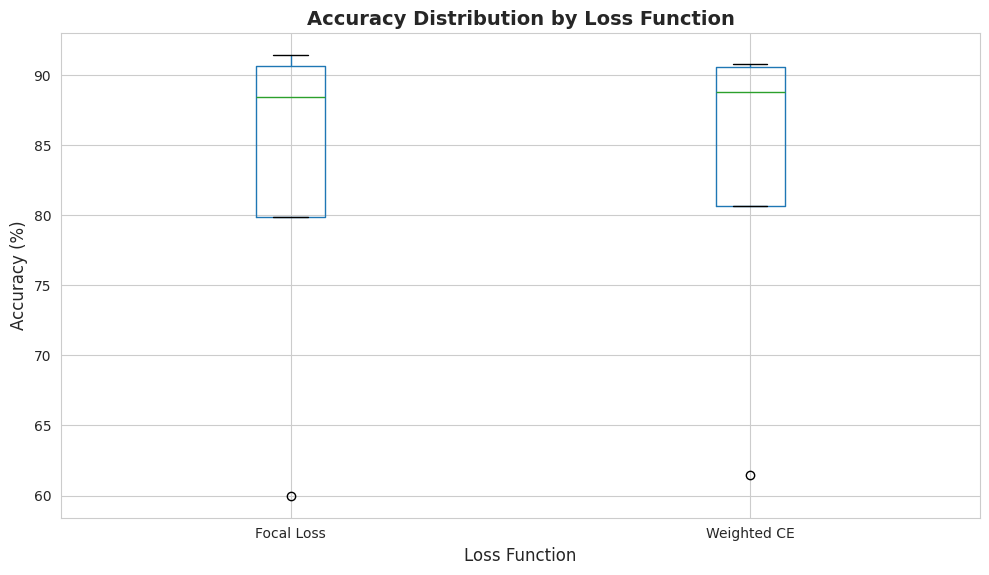

In [7]:
# Box plot of accuracy distribution
fig, ax = plt.subplots(figsize=(10, 6))

df.boxplot(column='accuracy', by='loss', ax=ax)
ax.set_xlabel('Loss Function', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Accuracy Distribution by Loss Function', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

## 7. Best Model Summary

In [8]:
# Get best overall model
best_row = df_sorted.iloc[0]

print("="*60)
print("🏆 BEST MODEL SUMMARY")
print("="*60)
print(f"Model:         {best_row['model']}")
print(f"Loss:          {best_row['loss']}")
print(f"Experiment ID: {best_row['experiment_id']}")
print("\nPerformance:")
print(f"  Accuracy:    {best_row['accuracy']:.2f}%")
print(f"  Precision:   {best_row['precision']:.2f}%")
print(f"  Recall:      {best_row['recall']:.2f}%")
print(f"  F1 Score:    {best_row['f1']:.2f}%")
if not pd.isna(best_row['auc']):
    print(f"  AUC:         {best_row['auc']:.2f}%")
print("="*60)

🏆 BEST MODEL SUMMARY
Model:         DenseNet-121
Loss:          Focal Loss
Experiment ID: exp02_densenet121_focal

Performance:
  Accuracy:    91.41%
  Precision:   91.03%
  Recall:      90.82%
  F1 Score:    90.87%
  AUC:         98.40%


## 8. Export Results

In [9]:
# Export formatted table
export_df = df_sorted[['model', 'loss', 'accuracy', 'precision', 'recall', 'f1']].copy()
export_df.columns = ['Model', 'Loss', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 (%)']
export_df = export_df.round(2)

print("\nFormatted Results Table:")
display(export_df)

# Save to LaTeX (for paper/thesis)
latex_path = '../results/results_table.tex'
export_df.to_latex(latex_path, index=False)
print(f"\n✓ LaTeX table saved to: {latex_path}")


Formatted Results Table:


,Model,Loss,Accuracy (%),Precision (%),Recall (%),F1 (%)
1,DenseNet-121,Focal Loss,91.41,91.03,90.82,90.87
0,DenseNet-121,Weighted CE,90.81,90.34,90.27,90.31
2,EfficientNet-B0,Weighted CE,90.48,90.07,89.77,89.92
3,EfficientNet-B0,Focal Loss,90.42,90.16,89.79,89.92
4,LeNet,Weighted CE,87.09,86.69,87.28,86.83
5,LeNet,Focal Loss,86.48,86.31,84.90,85.50
6,MLP,Weighted CE,61.45,55.83,57.63,55.47
7,MLP,Focal Loss,59.99,53.09,56.39,53.76



✓ LaTeX table saved to: ../results/results_table.tex
